<a href="https://colab.research.google.com/github/schedldave/aos-scripts/blob/main/Variance_with_Motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# utility function(s)
def imshow(image, *args, **kwargs):
    """A replacement for cv2.imshow() for use in Jupyter notebooks using matplotlib.

        Args:
          image : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image. shape
            (N, M, 3) is an NxM BGR color image. 
    """
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion  
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    # plt.show()

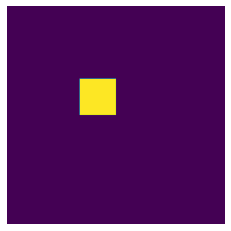

In [2]:
w = 300
a =  50
sx,sy = int(w/3), int(w/3)

single = np.zeros((300,300))
single[sx:sx+a,sy:sy+a] = 1.0

imshow(single)

0.06666666666666667


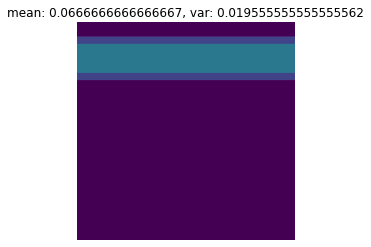

var (overlap/old): 0.06222222222222222; var (non-overlap): 0.008888888888888887


In [3]:
w = 300
a =  20
r = a*w / w**2 # ratio/mean
print(r)
d = int(a/2)
N = 5
sx,sy = int(a), int(a)
sum = np.zeros((w,w))

for i in range(N):
  single = np.zeros((w,w))
  x,y = sx + i*d, sy
  single[x:x+a,:] = 1.0
  sum += single

sum = sum/N

imshow(sum, vmin=0.0, vmax=1.0)
plt.title( 'mean: {}, var: {}'.format(np.mean(sum), np.var(sum)))
plt.show()

# variance computation
b = (d*N + a)/w
c = (d*(N*2) - a)/w
if d<=0:
  M = N
else:
  M = max(min(a/d,N),1)

v_overlap = r - r**2
v_nonoverlap = r/N - r**2
v = r/N - r**2 #(1-b)*r**2 + c*(r-M/N)**2
print('var (overlap/old): {}; var (non-overlap): {}'.format( v_overlap, v_nonoverlap ) )


0.025
[137   4  31  28]
[0. 1. 2. 3. 4.]


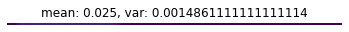

var (new): 0.0014861111111111112; var (full overlap/old): 0.024375; var (non-overlap): 0.00020833333333333327
var (approx): 0.0014305555555555556


In [55]:
w = 200
a =  5
r = a / w # ratio/mean
print(r)
d = 2
N = 30
sx,sy = int(a), int(a)
sum = np.zeros((1,w))

for i in range(N):
  single = np.zeros_like(sum)
  x,y = sx + i*d, sy
  single[:,x:x+a] = 1.0
  sum += single

count,bins=np.histogram(sum, bins=np.arange(np.max(sum)+2))
print(count) 
print(bins)
sum = sum/N

imshow(sum, vmin=0.0, vmax=1.0)
plt.title( 'mean: {}, var: {}'.format(np.mean(sum), np.var(sum)))
plt.show()

# variance computation
b = (d*N + a)/w
c = (d*(N*2) - a)/w
if d<=0:
  M = N
else:
  M = max(min(a/d,N),1)

v_overlap = r - r**2        # assuming everything is overlapping
v_nonoverlap = r/N - r**2   # assuming nothing is overlapping in the integral

term1 = np.sum(bins[:-1] * count)
term2 = np.sum(bins[:-1]**2 * count)
v = a**2/w**2 - 2*a/(N*w**2)*term1 + 1/(N**2*w)*term2
print('var (new): {}; var (full overlap/old): {}; var (non-overlap): {}'.format( v, v_overlap, v_nonoverlap ) )

# approximate term1 and term2
term1_ = M * (d*(N-1-M)+a)
term2_ = term1_ * M
v_ = a**2/w**2 - 2*a/(N*w**2)*term1_ + 1/(N**2*w)*term2_
print('var (approx): {}'.format( v_ ) )

